In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

In [2]:
!gdown 1WfT7WG1p1qRGd97D9iBRkV7wwk4JveJQ

Downloading...
From: https://drive.google.com/uc?id=1WfT7WG1p1qRGd97D9iBRkV7wwk4JveJQ
To: /content/noisy_images.npz
100% 19.2k/19.2k [00:00<00:00, 50.2MB/s]


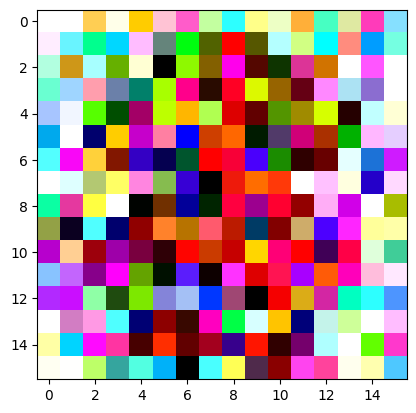

In [3]:
data = np.load('noisy_images.npz')
x_t = data['noisy_x']

plt.imshow(x_t)
plt.show()

In [4]:
def some_masic_func(x):
    """
    x보다 노이즈가 적은 이전 단계 이미지 분포의 평균을 반환하는 함수
    """
    data = np.load('noisy_images.npz')
    noisy_x = data['noisy_x']
    less_noisy_x = data['less_noisy_x']
    even_less_noisy_x = data['even_less_noisy_x']

    if np.linalg.norm(noisy_x - x) < np.linalg.norm(less_noisy_x - x):
        return less_noisy_x.reshape(-1)
    else:
        return even_less_noisy_x.reshape(-1)

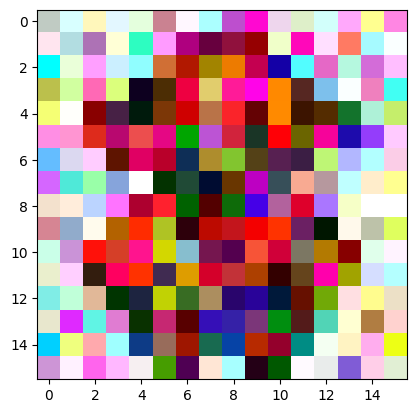

In [5]:
mu_t_1 = some_masic_func(x_t)

q_t_1 = multivariate_normal(mean=mu_t_1, cov=0.03 * np.eye(len(mu_t_1)))

x_t_1 = q_t_1.rvs(size=1).reshape(16,16,3).clip(0,1)

plt.imshow(x_t_1)
plt.show()

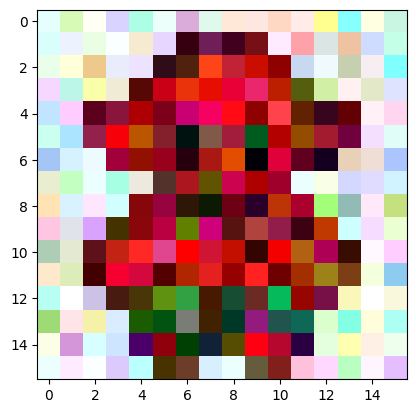

In [6]:
mu_t_2 = some_masic_func(x_t_1)

q_t_2 = multivariate_normal(mean=mu_t_2, cov=0.01 * np.eye(len(mu_t_2)))

x_t_2 = q_t_2.rvs(size=1).reshape(16,16,3).clip(0,1)

plt.imshow(x_t_2)
plt.show()